# Iniciando ubicaciones de arhivos y directorios para el espacio de trabajo

Se crea una nueva carpeta TensorFlow y y dentro de la misma, la carpeta workspace. La estructura de las carpetas se muestra a continuación.



```
TensorFlow/
├─ models/
│  ├─ community/
│  ├─ official/
│  ├─ orbit/
│  ├─ research/
│  └─ ...
├─ protoc/
├─ scripts/
└─ workspace/
    ├─ annotations/
    ├─ images/
    │  ├─ test/
    │  └─ train/
    ├─ models/
    └─ pre-trained-models/
```


    
Se explica cada uno de los directorios:

models: Contendrá los archivos del repositorio "Tensorflow Model Garden" con el cual se instalará la API de Detección de Objetos de Tensorflow.

protoc: Se almacenan los protocol buffers, librerías que utiliza la API de detección de objetos de Tensorflow para configurar el modelo y los parámetros de entrenamiento.

scripts: Esta carpeta almacenará scripts que podrán usarse para preprocesar los datos.

workspace: Se guardarán todas las configuraciones de entrenamiento. Contendrá todos los archivos relacionados con el entrenamiento del modelo.

workspace/annotations: Esta carpeta se utilizará para almacenar los archivos *.record de TensorFlow, que contienen la lista de anotaciones para las imágenes de nuestro conjunto de datos. También se almacenará el archivo "label_map.pbtxt" el cual contiene la información sobre las etiquetas de detección de los objetos.

workspace/images: Esta carpeta contiene todas las imágenes de nuestro conjunto de datos, así como los archivos *.xml respectivos producidos para cada una.

> images/train: Contiene los respectivos archivos que se utilizarán para entrenar nuestro modelo.

> images/test: Contiene los respectivos archivos que se utilizarán para probar nuestro modelo.

workspace/models: Esta carpeta contendrá una subcarpeta para cada entrenamiento. Cada subcarpeta contendrá el archivo de configuración del pipeline de entrenamiento *.config, así como todos los archivos generados durante el entrenamiento y evaluación de nuestro modelo.

workspace/pre-trained-models: Esta carpeta contendrá el modelo pre-entrenado SSD MobileNet v2, que se utilizarán como punto de control inicial para nuestros trabajos de capacitación.

In [ ]:
import os

PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

paths = {
  'WORKSPACE': os.path.join('Tensorflow', 'workspace'),
  'SCRIPTS': os.path.join('Tensorflow','scripts'),
  'APIMODEL': os.path.join('Tensorflow','models'),
  'ANNOTATION': os.path.join('Tensorflow', 'workspace','annotations'),
  'IMAGE': os.path.join('Tensorflow', 'workspace','images'),
  'MODEL': os.path.join('Tensorflow', 'workspace','models'),
  'PRETRAINED_MODEL': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
  'CHECKPOINT': os.path.join('Tensorflow', 'workspace','models', 'my_ssd_mobnet'),
 }

files = {
  'PIPELINE_CONFIG':os.path.join(paths['CHECKPOINT'], 'pipeline.config'),
  'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS'], TF_RECORD_SCRIPT_NAME),
  'LABELMAP': os.path.join(paths['ANNOTATION'], LABEL_MAP_NAME)
}

for path in paths.values():
  if not os.path.exists(path):
    !mkdir -p {path}

# Instalando Tensorflow y modelo pre-entrenado

En la carpeta de *Tensorflow/models* se descarga la API de detección de objetos de Tensorflow.

Se instala Protocol Buffer, librerías que utiliza la API de detección de objetos de Tensorflow para configurar el modelo y los parámetros de entrenamiento.

Se actualizan las librerías a Tensorflow 2.8.0.

Se actualizan las librerías CUDA a la version que funciona en Google Colab, lo cual acelera los tiempos de re-entrenamiento del modelo aprovechando la GPU.

Se descarga e instala el modelo de detección de objeto preentrenado SSD MobileNet V2.

In [ ]:
# Descarga el TensorFlow Model Garden
if not os.path.exists(os.path.join(paths['APIMODEL'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL']}

!apt-get install protobuf-compiler
!cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install .

In [ ]:
# ¡Restart Session!
# Luego de ejecutar esta celda no olvidar dar click en el botón de reiniciar sesión y continuar con la siguiente celda,
# de lo contrario no se reconoceran algunas librerías
!pip install tensorflow==2.8.0 --upgrade
!pip install "cython<3.0.0" wheel
!pip install "pyyaml==5.4.1" --no-build-isolation
!pip install tf-models-official==2.8.0
!pip install --upgrade protobuf==3.19.0

In [ ]:
import os

PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

paths = {
    'WORKSPACE': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS': os.path.join('Tensorflow','scripts'),
    'APIMODEL': os.path.join('Tensorflow','models'),
    'ANNOTATION': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT': os.path.join('Tensorflow', 'workspace','models', 'my_ssd_mobnet'),
 }

files = {
    'PIPELINE_CONFIG':os.path.join(paths['CHECKPOINT'], 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS'], TF_RECORD_SCRIPT_NAME),
    'LABELMAP': os.path.join(paths['ANNOTATION'], LABEL_MAP_NAME)
}

In [ ]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Vericando instalación
# De faltar alguna librería deberia instalarse y volver a ejecutar este script hasta que el resultado sea 'OK'.
!python {VERIFICATION_SCRIPT}

In [ ]:
# Descargando modelo de detección de objetos preentrenado SSD MobileNet v2
!wget {'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'}
!mv {'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'} {paths['PRETRAINED_MODEL']}
!cd {paths['PRETRAINED_MODEL']} && tar -zxvf {'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'}

--2024-02-08 00:15:33--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.251.163.207, 142.251.167.207, 172.253.115.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|142.251.163.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  --.-KB/s    in 0.1s    

2024-02-08 00:15:33 (185 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320

# Preparación de los datos

Se monta la cuenta de Google Drive para la transferencia de archivos.

Se copian los datos de entrenamiento y pruebas al directorio local de 'workspace/images'.



In [ ]:
# Montando Google Drive para la transferencia de archivos
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Modificar la dirección según donde se haya alojado la carpeta con los archivos
PATH_GDRIVE_PROJECT = os.path.join('drive', 'MyDrive', 'Esbiza_Proyecto_de_Grado', 'DesarrolloRP')

In [ ]:
# Copiando datos de entrenamiento y pruebas desde Google Drive
!cp -r {os.path.join(PATH_GDRIVE_PROJECT, 'images', 'test')} {paths['IMAGE']}
!cp -r {os.path.join(PATH_GDRIVE_PROJECT, 'images', 'train')} {paths['IMAGE']}

TensorFlow requiere un mapa de etiquetas (labelmaps), donde asigna cada una de las etiquetas utilizadas para identificar los objetos a valores enteros de su respectivo id. Este mapa de etiquetas se utiliza tanto en los procesos de entrenamiento como en los de detección.

En este caso el unico objeto es 'licence'.

Los archivos de mapas de etiquetas tienen la extensión *.pbtxt y se colocan dentro de la carpeta workspace/annotations.

In [ ]:
labels = [{'name':'licence', 'id':1}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write(f'\tid:{label["id"]}\n')
        f.write(f'\tname:\'{label["name"]}\'\n')
        f.write('}\n')

# Cambiando el formato de los datos

Para dar el formato de los datos es necesario pasar del formato PASCAL VOC de los archivos *.xml*, con el cual viene cada imagen en el conjunto de datos, al formato TFRecord que requiere la API de Tensorflow y que comprenden los archivos *.record*, para lo cual se utilizó el script *generate_tfrecord.py* que brinda Lyudmil Vladimirov en la siguiente guía:

https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/training.html#create-tensorflow-records


In [ ]:
# Se copia el archivo 'generate_tfrecord.py'
!cp {os.path.join(PATH_GDRIVE_PROJECT, 'generate_tfrecord.py')} {paths['SCRIPTS']}

# Se transforman los datos de entrenamiento
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION'], 'train.record')}

# Se transforman los datos de prueba
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION'], 'test.record')}

Successfully created the TFRecord file: Tensorflow/workspace/annotations/train.record
Successfully created the TFRecord file: Tensorflow/workspace/annotations/test.record


# Modificando archivo Config para la tranferencia de aprendizaje

Se copia el archivo pipeline config que viene por defecto en el modelo pre-entrenado.

Se modifica el pipeline declarando:
* Num clases: 1
* Batch size: 16
* Checkpoint: 0
* Tipo de fine tune (tipo de reentrenamiento): deteccion
* Datos de Labelmap
* Datos de las TFRecord




In [ ]:
# Copiando archivo de Configuracion del Modelo
!cp {os.path.join(paths['PRETRAINED_MODEL'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {paths['CHECKPOINT']}

In [ ]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:
    proto_str = f.read()
    text_format.Merge(proto_str, pipeline_config)

# Path ckpt-0 para entrenar el modelo desde cero
FINE_TUNE_CKPT_PATH = os.path.join(paths['PRETRAINED_MODEL'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')

pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 16
pipeline_config.train_config.fine_tune_checkpoint = FINE_TUNE_CKPT_PATH
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION'], 'test.record')]

config_text = text_format.MessageToString(pipeline_config)
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:
    f.write(config_text)

In [ ]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
config

{'model': ssd {
   num_classes: 1
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   match

# Re-entrenando el modelo

Para re-entrenar el modelo se utiliza el script *model_main_tf2.py* brindado por la API de Tensorflow.

Se formula el comando indicando el script, la carpeta de checkpoints, donde se guardarán puntos de control del modelo cada cierto tiempo durante el entrenamiento, el pipeline config y el numero de steps de entrenamiento.

El entrenamiento demora varias horas en finalizarse.

In [ ]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL'], 'research', 'object_detection', 'model_main_tf2.py')

command = f"python {TRAINING_SCRIPT} --model_dir={paths['CHECKPOINT']} --pipeline_config_path={files['PIPELINE_CONFIG']} --num_train_steps=10000"

print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --num_train_steps=10000


In [ ]:
!{command}

2024-01-22 21:19:26.750556: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl7strings6StrCatB5cxx11ERKNS0_8AlphaNumES3_']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflo

In [ ]:
# Guardando checkpoints en el path del proyecto en GDrive
!cp -r {paths['CHECKPOINT'] + '/*'} {os.path.join(PATH_GDRIVE_PROJECT, 'models', 'entrenamiento')}

# Evaluando el modelo

Cuando se genera un conjunto de nuevos archivos de puntos de control al entrenar el modelo, el proceso de evaluación utiliza estos archivos y evalúa qué tan bien se desempeña el modelo en la detección de objetos en el conjunto de datos de prueba. Los resultados de esta evaluación se resumen en forma de algunas métricas, que pueden examinarse a lo largo del tiempo.

Se utilizan las métricas Average Precision, Average Recall y Loss.

Se ejecuta un comando con el script *model_main_tf2.py* para evaluar los resultados según cada checkpoint que se generó.

In [ ]:
command = f"python {TRAINING_SCRIPT} --model_dir={paths['CHECKPOINT']} --pipeline_config_path={files['PIPELINE_CONFIG']} --checkpoint_dir={paths['CHECKPOINT']}"

In [ ]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet


In [ ]:
!{command}

2024-01-29 20:08:06.890287: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl7strings6StrCatB5cxx11ERKNS0_8AlphaNumES3_']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflo

In [ ]:
# Se guarda en el directorio del proyecto en Gdrive la carpeta eval que se generó al evaluar el modelo, luego con la extension de Tensorboard podemos ver las gráficas y resultados generados
!cp -r {os.path.join(paths['CHECKPOINT'], 'eval')} {os.path.join(PATH_GDRIVE_PROJECT, 'models', 'entrenamiento')}

# Cargar modelo entrenado desde un checkpoint

Se copian los pesos (weights) del modelo re-entrenado con 10k steps para cargar el modelo y realizar las pruebas.

Se indica que el checkpoint a cargar es el ckpt-7 el cual corresponde al step 6000.

Se carga el pipeline y el modelo de detección.

Se crea la función detect_fn, la cual se utiliza para realizar las detecciones ingresando la imagen previamente convertida en tensor.

In [ ]:
# Se copian los datos de un entrenamiento anterior ya finalizado, no ejecutar esta celda
# en caso de querer continuar con el modelo entrenado en pasos previos.
!cp -r {os.path.join(PATH_GDRIVE_PROJECT, 'models', 'finalizado')} {paths['MODEL']}

paths['CHECKPOINT'] = os.path.join('Tensorflow', 'workspace','models', 'finalizado')
files['PIPELINE_CONFIG'] = os.path.join(paths['CHECKPOINT'], 'pipeline.config')
paths['ANNOTATION']

In [ ]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [ ]:
# Evita el consumo completo de GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5120)])
    except RunTimeError as e:
        print(e)

In [ ]:
ckpt_num = 'ckpt-7'

In [ ]:
# Carga el pipeline config y el modelo de detección
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restaura el checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT'], ckpt_num)).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# Detectando desde una imagen

Se importan las librerias necesarias y se genear la función "detectar" la cual lee la imagen según la dirección ingresada convirtiendola en un objeto Tensor, llama al modelo, realiza las detecciones y muestra las imagen con las detecciones.

Se realiza una prueba con la imagen de patente "AB123CD".

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
category_index = label_map_util.create_category_index_from_labelmap(os.path.join(paths['ANNOTATION'], 'label_map.pbtxt'))

In [ ]:
def detectar(path_imagen):
  img = cv2.imread(path_imagen)
  image_np = np.array(img)

  input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
  detections = detect_fn(input_tensor)

  num_detections = int(detections.pop('num_detections'))
  detections = {key: value[0, :num_detections].numpy()
                for key, value in detections.items()}
  detections['num_detections'] = num_detections

  detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

  label_id_offset = 1
  image_np_with_detections = image_np.copy()

  viz_utils.visualize_boxes_and_labels_on_image_array(
              image_np_with_detections,
              detections['detection_boxes'],
              detections['detection_classes']+label_id_offset,
              detections['detection_scores'],
              category_index,
              use_normalized_coordinates=True,
              max_boxes_to_draw=5,
              min_score_thresh=.5,
              agnostic_mode=False)

  plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
  plt.show()

  return image_np, detections

Tensorflow/workspace/images/test/AB123CD.jpg


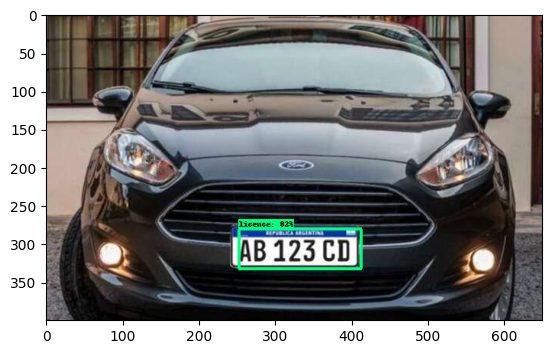

Confianza de detección:  81.58 %


In [ ]:
IMAGE_PATH = os.path.join(paths['IMAGE'], 'test', 'AB123CD.jpg')
print(IMAGE_PATH)
im, dtc = detectar(IMAGE_PATH)
confianza = list(filter(lambda x: x> 0.6, dtc['detection_scores']))[0]
print('Confianza de detección: ', round(confianza * 100, 2), '%')

# Aplicando Tesseract-OCR

Se descargar e instalan la librerías de Tesseract-OCR.

Se instala pytesseract y otra librerías complementarias.

Se crean las funciones para realizar los reconocimientos y pruebas.

Se juntan las funciones para detectar una patente con las funciones OCR para reconocer los caracteres de la patente.

Se realizan pruebas con las imagenes de test

In [ ]:
!sudo apt-get install libleptonica-dev tesseract-ocr tesseract-ocr libtesseract-dev python3-pil tesseract-ocr-eng tesseract-ocr-script-latn

!pip install pytesseract
!pip install tesseract-ocr
!pip install torch torchvision torchaudio

In [ ]:
import pytesseract
import re

def ocr_it(image, detections, detection_threshold):

    # Scores, boxes and classes arriba del umbrar detection_threshold
    scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
    boxes = detections['detection_boxes'][:len(scores)]
    classes = detections['detection_classes'][:len(scores)]

    # Dimensiones de la imagen
    height, width = image.shape[:2]

    # Recorta la patente en la imagen, reconoce el texto y retorna los datos de
    # texto reconocido, confianza de deteccion e imagen recortada de la patente
    for idx, box in enumerate(boxes):
        roi = box*[height, width, height, width]
        region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]

        options = "--psm 7 -c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ"
        ocr_result = pytesseract.image_to_string(region, lang='eng', config=options)
        ocr_result = ocr_result.replace('\n', '')
        ocr_result = re.sub(r'[^A-Z0-9]', '', ocr_result)

        return ocr_result, round(scores[idx] * 100, 2), region


def reconocer_patente(path_imagen):
  imagen, detecciones = detectar(path_imagen)

  patente = ""
  region = None
  confidence = None

  scores = list(filter(lambda x: x> 0.6, detecciones['detection_scores']))

  if (len(scores) > 0):
    patente, confidence, region = ocr_it(imagen, detecciones, 0.6)

  return patente, confidence, region

def paths_filter(item):
  if not(item.endswith(".xml")):
    return True
  else:
    return False

paths_test = sorted(list(filter(paths_filter, os.listdir(os.path.join(paths['IMAGE'], 'test')))))

In [ ]:
for path_imagen in paths_test:
  print(path_imagen)
  patente, confidence, region = reconocer_patente(os.path.join(paths['IMAGE'], 'test', path_imagen))
  if confidence:
    print(f"Patente: {patente} \nConfianza: {confidence} %")
  else:
    print("Patente no detectada")
  print("------------------------------------------------------------")

# Tener en cuenta.
# Las patentes detectadas con una confianza de 60% o menos cuentan como "Patente no detectada"

Output hidden; open in https://colab.research.google.com to view.